In [ ]:
# Imports

from os import listdir
from os.path import isfile, join
import numpy as np
import json
import random
import inspect

In [36]:
# Create DataSet

onlyfiles = [f for f in listdir("../dataset/") if isfile(join("../dataset/", f))]

dataset: list[tuple[tuple, tuple, str]] = list()
test_dataset = list()

training_file_path = f'../dataset/{onlyfiles[0]}'
test_file_path = f'../dataset/{onlyfiles[1]}'

patterns = ['Sigmoid', 'SigmoidReversed', 'Normal', 'NormalFlipped', 'Plain', 'LinearIncrease', 'LinearDecrease']

def parse(path: str, pattern_name: str) -> tuple[np.ndarray, np.ndarray]:

    X_model_2: list(tuple[np.ndarray, int]) = list() # Данные для обучения для полносвязной НС
    _X = np.empty((0, 14), int) # Данные для обучения (координаты реконструкции фазового портрета) до сортировки для перцептронов
    _y = np.array([]) # 1 - соответствует правильному паттерну, на который тренируется сеть, 0 - всем остальным до сортировки для перцептронов

    random_value = np.array([]) # Случайная величина для перемешивания датасета
    with open(path, 'r') as json_file:
        data: dict = json.load(json_file)
        
        for ptrn in list(data.keys()):
            all_coordinates: list = data[ptrn]
            
            for local_cordinates in all_coordinates:
                X_model_2.append((np.array([np.append(np.array(local_cordinates['x']), np.array(local_cordinates['y'])).tolist()]), list(data.keys()).index(ptrn)))
                random_value = np.append(random_value, np.random.rand()) # Генерация случайного числа от 0 до 1

    # Сортировка по случайным величинам
    return np.array([x for _, x in sorted(zip(random_value, X_model_2), key=lambda x: x[0])])


for ptrn in patterns:

    pattern_name = ptrn
    X = parse(training_file_path, pattern_name)
    test_data_X = parse(test_file_path, pattern_name)

    dataset = [*dataset, *X]
    test_dataset = [*test_dataset, *test_data_X]
x, y = dataset[12001]
print(x, y)
x, y = test_dataset[12001]
print(x, y)


['26136163268846ea912ade4c2d2b4e5f.json', 'e9f2619a28054ec6a081e0bb30822271.json']


C:\Users\o3xic\AppData\Local\Temp\ipykernel_17400\3823840215.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array([x for _, x in sorted(zip(random_value, X_model_2), key=lambda x: x[0])])


[[-11  -3  -2   0   1   1   3  -9  -4  -2  -1   0   1   2]] 0
[[-10  -2  -2   0   1   2   3  -8  -3  -2  -1   0   1   2]] 6


: 

[Epoch]: 0
[Epoch]: 1
[Epoch]: 2
[Epoch]: 3
[Epoch]: 4
[Epoch]: 5
[Epoch]: 6
[Epoch]: 7
[Epoch]: 8
[Epoch]: 9
[Epoch]: 10
[Epoch]: 11
[Epoch]: 12
[Epoch]: 13
[Epoch]: 14
[Epoch]: 15
[Epoch]: 16
[Epoch]: 17
[Epoch]: 18
[Epoch]: 19
[Epoch]: 20
[Epoch]: 21
[Epoch]: 22
[Epoch]: 23
[Epoch]: 24
[Epoch]: 25
[Epoch]: 26
[Epoch]: 27
[Epoch]: 28
[Epoch]: 29
[Epoch]: 30
[Epoch]: 31
[Epoch]: 32
[Epoch]: 33
[Epoch]: 34
[Epoch]: 35
[Epoch]: 36
[Epoch]: 37
[Epoch]: 38
[Epoch]: 39
[Epoch]: 40
[Epoch]: 41
[Epoch]: 42
[Epoch]: 43
[Epoch]: 44
[Epoch]: 45
[Epoch]: 46
[Epoch]: 47
[Epoch]: 48
[Epoch]: 49
[Epoch]: 50
[Epoch]: 51
[Epoch]: 52
[Epoch]: 53
[Epoch]: 54
[Epoch]: 55
[Epoch]: 56
[Epoch]: 57
[Epoch]: 58
[Epoch]: 59
[Epoch]: 60
[Epoch]: 61
[Epoch]: 62
[Epoch]: 63
[Epoch]: 64
[Epoch]: 65
[Epoch]: 66
[Epoch]: 67
[Epoch]: 68
[Epoch]: 69
[Epoch]: 70
[Epoch]: 71
[Epoch]: 72
[Epoch]: 73
[Epoch]: 74
[Epoch]: 75
[Epoch]: 76
[Epoch]: 77
[Epoch]: 78
[Epoch]: 79
[Epoch]: 80
[Epoch]: 81
[Epoch]: 82
[Epoch]: 83
[E

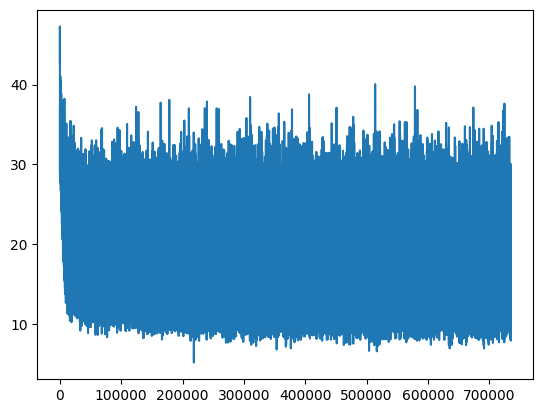

In [35]:
import random
import numpy as np

INPUT_DIM = 14
OUT_DIM = 7
H_DIM = 7

def relu(t):
    return np.maximum(t, 0)

def softmax(t):
    out = np.exp(t)
    return out / np.sum(out)

def softmax_batch(t):
    out = np.exp(t)
    return out / np.sum(out, axis=1, keepdims=True)

def sparse_cross_entropy(z, y):
    return -np.log(z[0, y])

def sparse_cross_entropy_batch(z, y):
    return -np.log(np.array([z[j, y[j]] for j in range(len(y))]))

def to_full(y, num_classes):
    y_full = np.zeros((1, num_classes))
    y_full[0, y] = 1
    return y_full

def to_full_batch(y, num_classes):
    y_full = np.zeros((len(y), num_classes))
    for j, yj in enumerate(y):
        y_full[j, yj] = 1
    return y_full

def relu_deriv(t):
    return (t >= 0).astype(float)

_dataset = dataset

W1 = np.random.rand(INPUT_DIM, H_DIM)
b1 = np.random.rand(1, H_DIM)
W2 = np.random.rand(H_DIM, OUT_DIM)
b2 = np.random.rand(1, OUT_DIM)

W1 = (W1 - 0.5) * 2 * np.sqrt(1/INPUT_DIM)
b1 = (b1 - 0.5) * 2 * np.sqrt(1/INPUT_DIM)
W2 = (W2 - 0.5) * 2 * np.sqrt(1/H_DIM)
b2 = (b2 - 0.5) * 2 * np.sqrt(1/H_DIM)

ALPHA = 0.0001
NUM_EPOCHS = 100
BATCH_SIZE = 20

loss_arr = []

for ep in range(NUM_EPOCHS):
    random.shuffle(_dataset)
    print(f'[Epoch]: {ep}')
    for i in range(len(_dataset) // BATCH_SIZE):

        batch_x, batch_y = zip(*_dataset[i*BATCH_SIZE : i*BATCH_SIZE+BATCH_SIZE])
        x = np.concatenate(batch_x, axis=0)
        y = np.array(batch_y)

        # Forward
        t1 = x @ W1 + b1
        h1 = relu(t1)
        t2 = h1 @ W2 + b2
        z = softmax_batch(t2)
        E = np.sum(sparse_cross_entropy_batch(z, y))

        # Backward
        y_full = to_full_batch(y, OUT_DIM)
        dE_dt2 = z - y_full
        dE_dW2 = h1.T @ dE_dt2
        dE_db2 = np.sum(dE_dt2, axis=0, keepdims=True)
        dE_dh1 = dE_dt2 @ W2.T
        dE_dt1 = dE_dh1 * relu_deriv(t1)
        dE_dW1 = x.T @ dE_dt1
        dE_db1 = np.sum(dE_dt1, axis=0, keepdims=True)

        # Update
        W1 = W1 - ALPHA * dE_dW1
        b1 = b1 - ALPHA * dE_db1
        W2 = W2 - ALPHA * dE_dW2
        b2 = b2 - ALPHA * dE_db2

        loss_arr.append(E)

def predict(x):
    t1 = x @ W1 + b1
    h1 = relu(t1)
    t2 = h1 @ W2 + b2
    z = softmax_batch(t2)
    return z

def calc_accuracy():
    correct = 0
    for x, y in dataset:
        z = predict(x)
        y_pred = np.argmax(z)
        if y_pred == y:
            correct += 1
    acc = correct / len(dataset)
    return acc

accuracy = calc_accuracy()
print("Accuracy:", accuracy)

import matplotlib.pyplot as plt
plt.plot(loss_arr)
plt.show()



In [34]:
_test_dataset = test_dataset
random.shuffle(_test_dataset)

counter = 0
for data in _test_dataset:
    x, y = data
    z = predict(x[0])
    y_pred = np.argmax(z)
    print(y_pred, y)
    if y_pred == y:
        counter += 1
print(counter)
print("Test accuracy: " + str(counter/len(dataset)))

5 5
0 0
5 5
3 3
4 2
3 3
1 1
4 0
2 2
4 4
6 0
1 1
1 5
0 0
6 0
0 6
4 1
2 2
1 5
1 1
6 0
4 4
3 3
0 6
6 2
2 2
0 0
4 4
4 3
1 1
1 5
4 3
6 6
4 4
4 4
5 5
6 6
2 2
2 3
0 0
0 6
5 5
3 3
4 3
4 5
5 5
1 3
4 3
3 3
0 0
5 5
4 0
2 2
3 5
5 5
1 5
5 5
1 5
4 5
5 5
0 4
1 5
4 3
6 6
3 3
1 1
3 4
1 1
2 2
3 3
0 0
5 5
2 2
0 6
4 3
4 4
0 0
6 6
0 6
0 0
3 3
4 3
5 5
3 4
3 3
4 3
2 2
2 2
4 3
1 1
1 5
1 5
0 6
2 2
2 2
5 5
0 0
4 3
1 1
5 6
6 0
3 3
1 1
6 6
4 4
1 1
6 0
3 3
6 0
4 4
5 5
4 4
3 3
4 4
1 1
1 5
0 0
1 5
1 1
0 0
1 1
6 6
6 0
4 4
1 1
6 6
6 2
6 0
2 4
4 4
4 3
2 2
4 2
6 6
1 5
5 5
1 1
3 3
4 3
0 0
0 6
1 1
1 1
5 5
2 2
3 3
1 1
5 1
4 3
3 3
3 4
4 4
2 2
0 0
1 1
4 4
1 5
2 2
2 2
0 6
4 3
2 2
6 2
2 2
3 3
6 6
0 0
6 6
1 1
5 5
5 5
3 3
2 2
1 1
4 3
4 4
1 5
0 6
1 1
4 3
3 5
3 3
6 0
1 1
0 6
4 4
6 0
1 1
5 5
1 5
1 5
5 5
1 5
5 5
6 0
5 5
1 5
5 5
4 4
5 1
2 2
6 0
1 1
1 5
1 5
4 4
0 0
1 1
3 3
0 6
5 1
2 2
4 4
5 5
5 5
6 6
2 2
2 6
1 1
4 4
3 3
6 6
4 1
1 1
4 0
3 3
5 5
5 5
6 6
5 1
0 0
6 0
5 1
6 2
5 1
4 4
2 3
1 1
4 4
0 6
2 2
6 0
2 2
6 6
4 4
2 2
1 5
6 6
4 4
0 0


In [ ]:
# Perceptron

class Perceptron:
    def __init__(self, lr=0.01, epochs=5):
        self.lr = lr
        self.epochs = epochs
        self.weights = None

    def fit(self, X, y):
        """
        Our fit function trains on the dataset X and tries to predict vector y,
        Using the learning rate, it will modify it's weight vector to increase
        it's accuracy in predictions.
        It will iterate over the X dataset as defined by the epochs.
        Args:
            X: The input data (numpy array of shape [n_samples * m_features])
            y: Class labels vector (numpy array of shape [n_samples])
        """
        # a vector of floats between 0 and 1
        weights = np.random.rand(X.shape[1],)

        for epoch in range(self.epochs):
            # list of predicted classes for our accuracy calculation
            predicted = []
            for i_index, sample in enumerate(X):
                y_hat = self.predict(sample, weights)
                predicted.append(y_hat)  # add our new prediction to the array
                for j_index, feature in enumerate(weights):
                    # update our weight values
                    delta = self.lr * (y[i_index] - y_hat)
                    delta = delta * sample[j_index-1]
                    weights[j_index-1] = weights[j_index-1] + delta
            # print('[Epoch {ep}] Accuracy: {acc}'.format(
            #     ep=epoch, acc=self._calculate_accuracy(y, predicted)
            # ))
        self.weights = weights

    def _calculate_accuracy(self, actual, predicted):
        """
        Calculate the accuracy of predictions for this epoch.
        Args:
            actual: vector of actual class values (the y vector) [n_samples]
            predicted: vector of predicted class values [n_samples]
        """
        return sum(np.array(predicted) == np.array(actual)) / float(len(actual))

    def predict(self, x, w):
        """
        Create a binary prediction from an activation function on the data
        sample and the weight vector.
        Args:
            x: vector of the data sample - shape [m_features]
            w: vector of the weights - shape [m_features]
        Returns:
            0 or 1
        """
        res = self._sum(x, w)
        # print(res)
        return 1 if res > 0.0 else 0.0

    def _sum(self, x, w):
        """
        Multiply our sample and weight vector elements then the sum of the
        result.
        Args:
            x: vector of the data sample - shape [m_features]
            w: vector of the weights - shape [m_features]
        Returns:
            Int of the sum of vector products
        """
        return np.sum(np.dot(x, np.transpose(w)))


In [ ]:
perceptrons: list = [Perceptron() for _ in range(len(patterns))]